In [ ]:
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-gevw7ud_
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-gevw7ud_
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp37-none-any.whl size=8312 sha256=f1f51676881c068cad044a273dc27d7448bf40bf294b9538e4572d7ffe2ef1e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_duexmnr/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [ ]:
!pip install Keras-Applications
!pip show keras-vggface

     |████████████████████████████████| 51kB 2.8MB/s 
Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, scipy, six, pyyaml, numpy, h5py, pillow
Required-by: 


In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 4.3MB/s 


In [ ]:
import mtcnn
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
import PIL
from PIL import Image
import os
from urllib import request
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


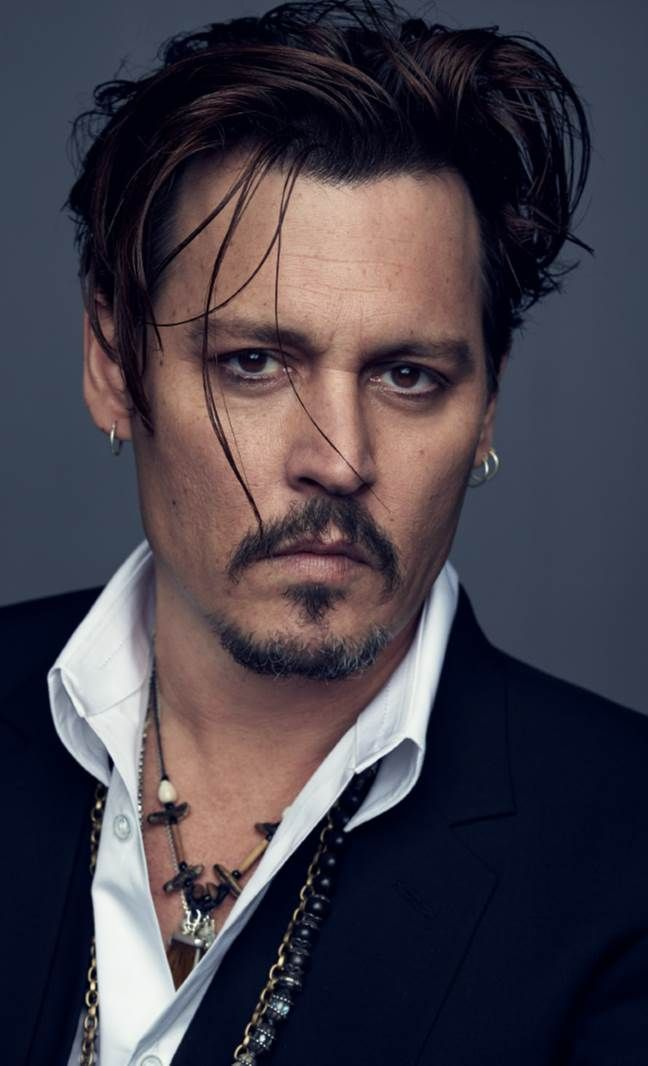

In [ ]:
#online
url = "https://i.pinimg.com/originals/e2/81/cc/e281cce8e26db25388a247a2c994d1f4.jpg"
res = request.urlopen(url)
img = np.asarray(bytearray(res.read()), dtype='uint8')
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
putanja_slike = "/content/drive/MyDrive/Colab Notebooks/20210217_191829.jpg"
slika=Image.open(putanja_slike)
slika=slika.rotate(270)
img = np.asarray(slika, dtype='uint8')

In [ ]:
detector = MTCNN()

In [ ]:
# detekcija face(pozicija ociju,usta...)
detections = detector.detect_faces(img)
print(detections)

[{'box': [178, 204, 306, 426], 'confidence': 0.9997379183769226, 'keypoints': {'left_eye': (261, 362), 'right_eye': (412, 381), 'nose': (334, 463), 'mouth_left': (268, 540), 'mouth_right': (377, 553)}}]


In [ ]:
x1, y1, width, height = detections[0]['box']
dw = round(width * 0)
dh = round(height * 0)
x2, y2 = x1 + width + dw, y1 + height + dh
face = img[y1:y2, x1:x2]

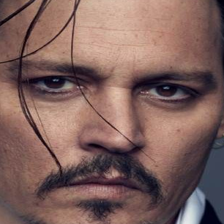

In [ ]:
# resize
face = PIL.Image.fromarray(face)
face = face.resize((224, 224))
face = np.asarray(face)
cv2_imshow(face)

In [ ]:
face_pp = face.astype('float32')
face_pp = np.expand_dims(face_pp, axis = 0)
face_pp = preprocess_input(face_pp, version = 2)

In [ ]:
model = VGGFace(model= 'resnet50') # load model
print(model)

In [ ]:
prediction = model.predict(face_pp) # predikcija

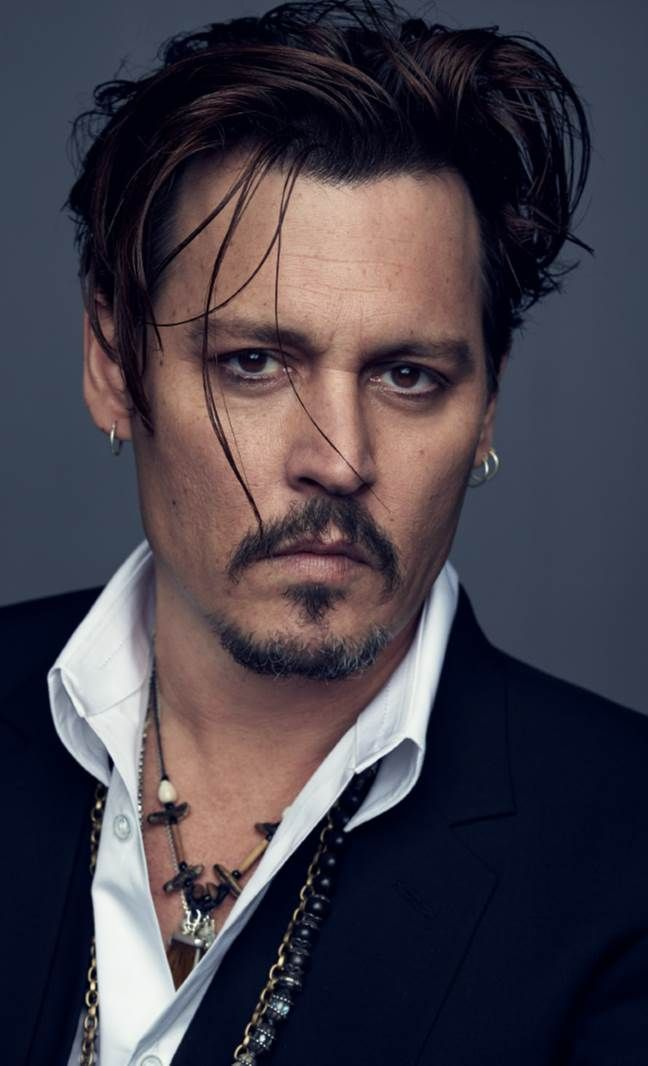

b' Johnny_Depp': 99.234%
b' The_Tallest_Man_on_Earth': 0.402%
b' Rajat_Tokas': 0.058%
b' Pepe_Aguilar': 0.033%
b' Clayne_Crawford': 0.032%


In [ ]:
results = decode_predictions(prediction) # ispis predikcija
cv2_imshow(img)
for result in results[0]:
  print ('%s: %.3f%%' % (result[0], result[1]*100))